In [9]:
#Notebook 1: Data Loading & Initial Checks
import pandas as pd

# Load the data
file_path = "/content/train.csv"  # Update path as needed
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Basic checks
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Shape: (233154, 41)
Columns: ['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date.of.birth', 'employment.type', 'disbursaldate', 'state_id', 'employee_code_id', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns.score', 'perform_cns.score.description', 'pri.no.of.accts', 'pri.active.accts', 'pri.overdue.accts', 'pri.current.balance', 'pri.sanctioned.amount', 'pri.disbursed.amount', 'sec.no.of.accts', 'sec.active.accts', 'sec.overdue.accts', 'sec.current.balance', 'sec.sanctioned.amount', 'sec.disbursed.amount', 'primary.instal.amt', 'sec.instal.amt', 'new.accts.in.last.six.months', 'delinquent.accts.in.last.six.months', 'average.acct.age', 'credit.history.length', 'no.of_inquiries', 'loan_default']
   uniqueid  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    

uniqueid                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
current_pincode_id                        0
date.of.birth                             0
employment.type                        7661
disbursaldate                             0
state_id                                  0
employee_code_id                          0
mobileno_avl_flag                         0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns.score                         0
perform_cns.score.description             0
pri.no.of.accts                           0
pri.active.accts                

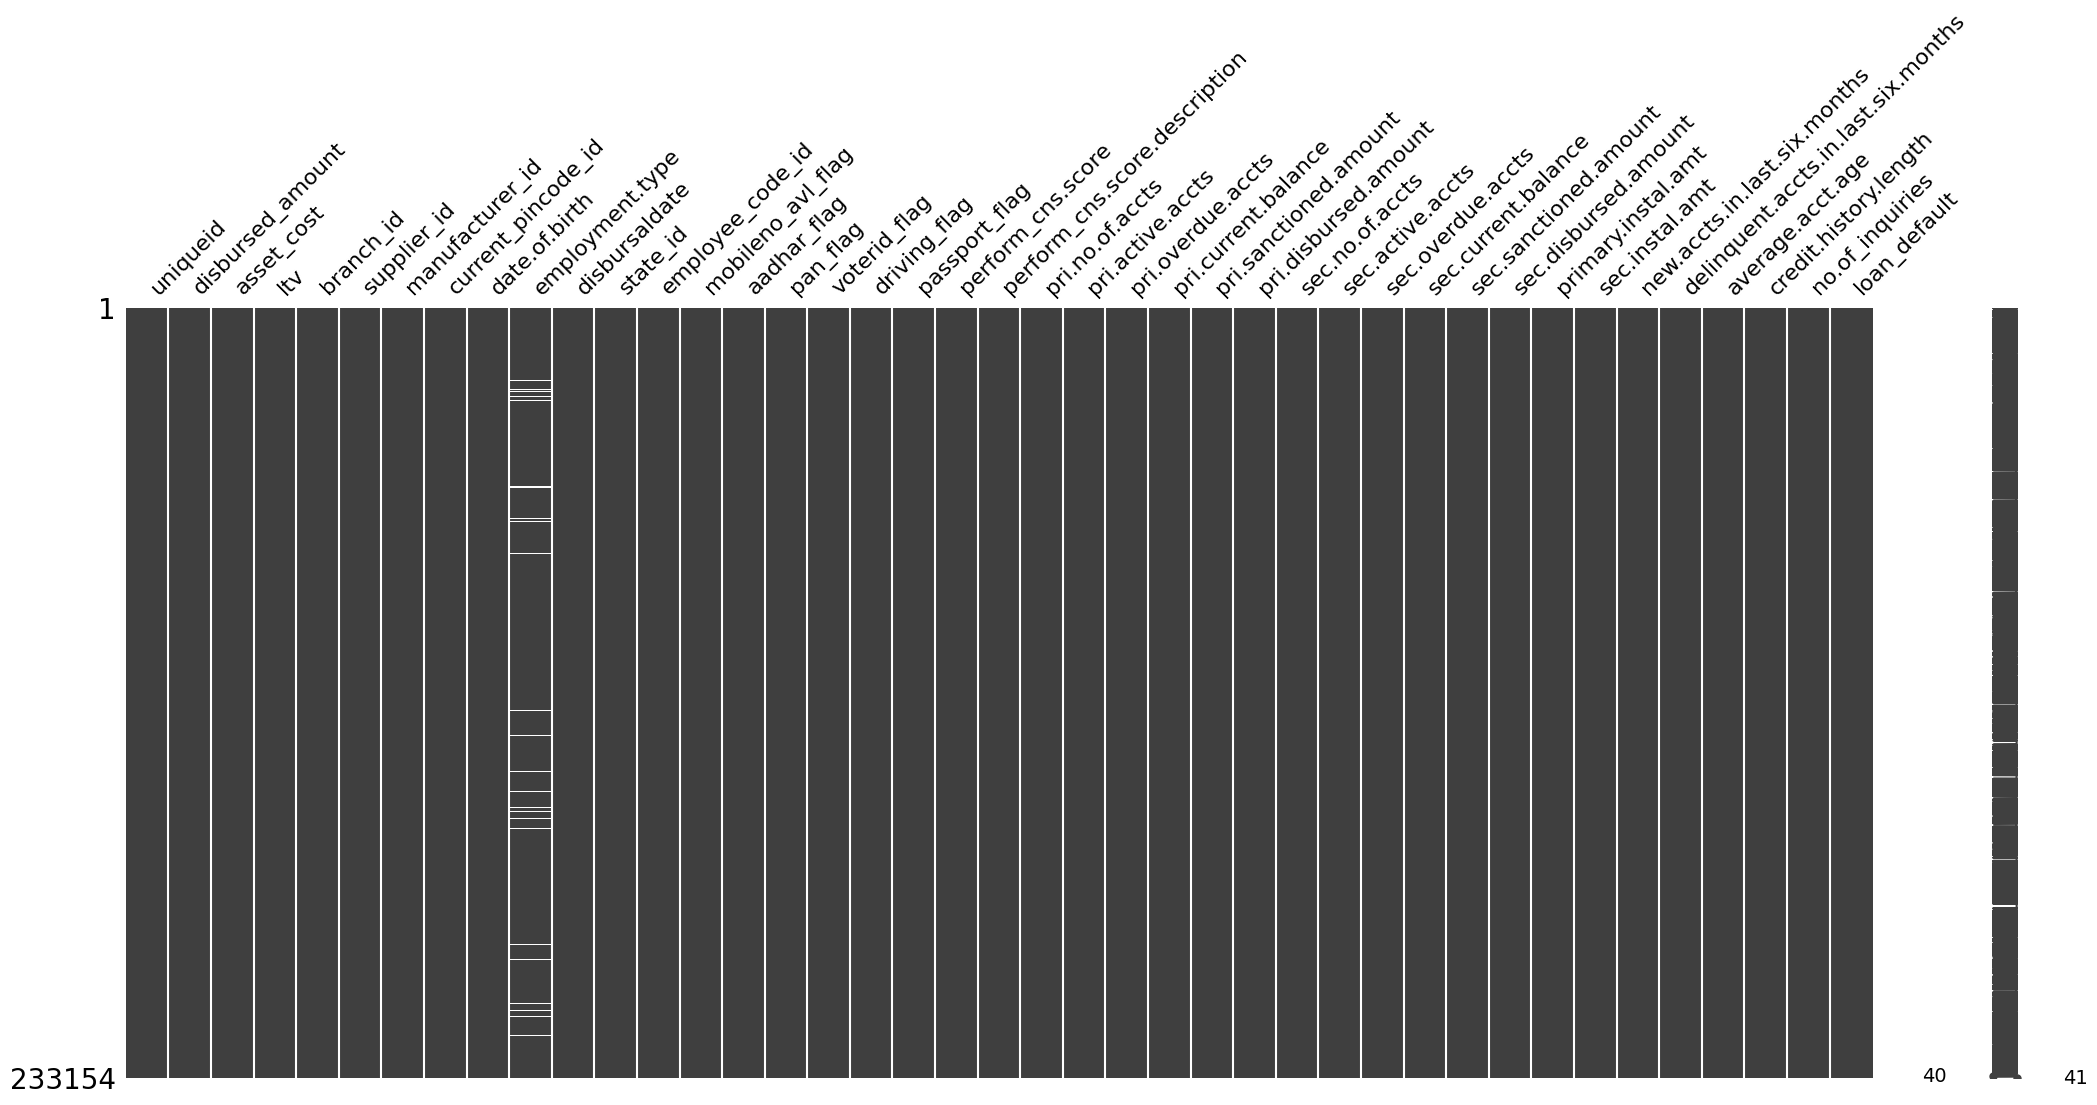

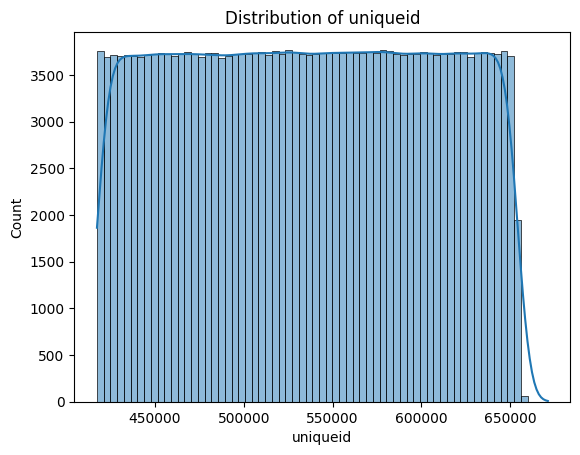

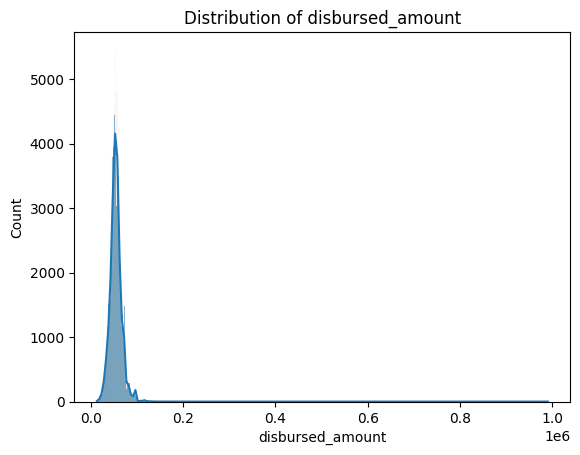

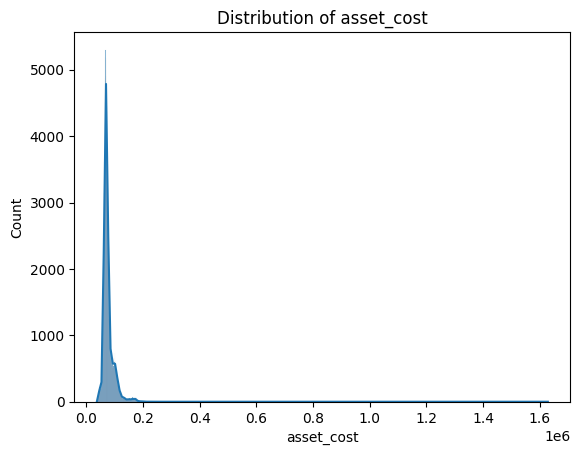

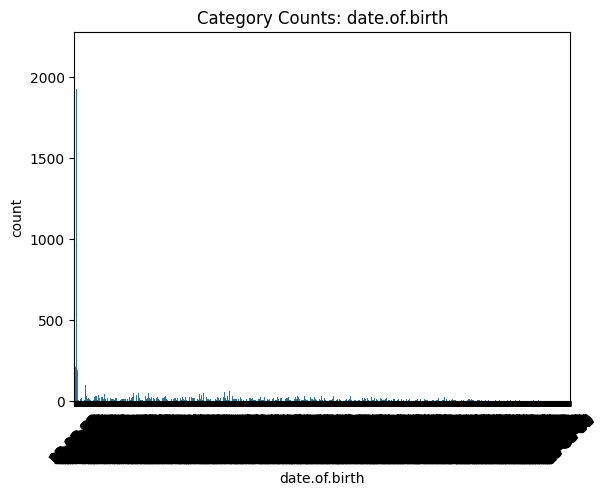

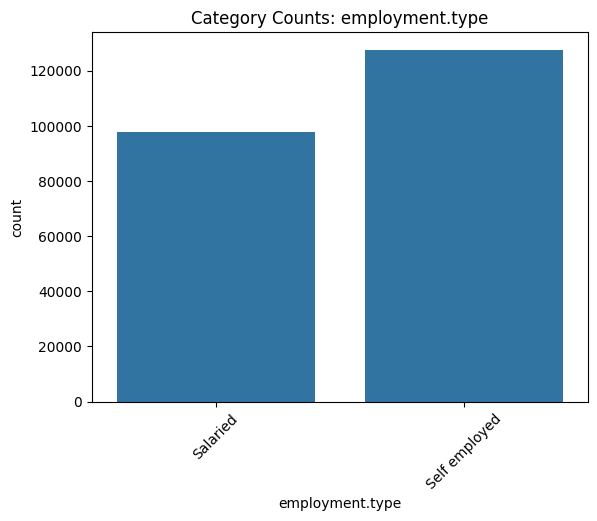

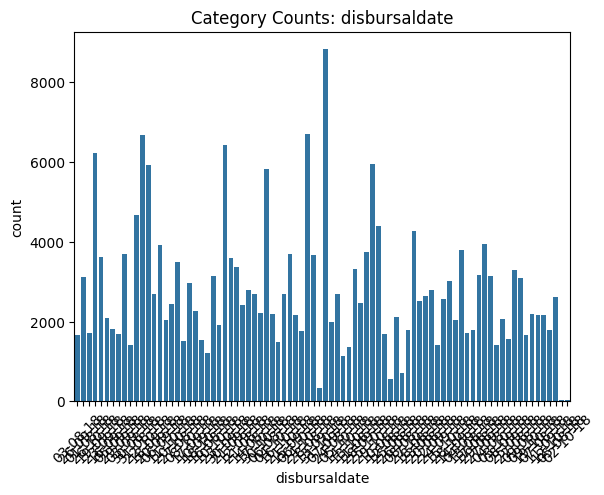

In [10]:
#Notebook 2: Exploratory Data Analysis (EDA)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Missing values
print(df.isnull().sum())
msno.matrix(df)
plt.show()

# Numeric feature distribution
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols[:3]:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical feature distribution
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols[:3]:
    sns.countplot(x=col, data=df)
    plt.title(f"Category Counts: {col}")
    plt.xticks(rotation=45)
    plt.show()


In [14]:
print(df.columns.tolist())


['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date.of.birth', 'employment.type', 'disbursaldate', 'state_id', 'employee_code_id', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns.score', 'perform_cns.score.description', 'pri.no.of.accts', 'pri.active.accts', 'pri.overdue.accts', 'pri.current.balance', 'pri.sanctioned.amount', 'pri.disbursed.amount', 'sec.no.of.accts', 'sec.active.accts', 'sec.overdue.accts', 'sec.current.balance', 'sec.sanctioned.amount', 'sec.disbursed.amount', 'primary.instal.amt', 'sec.instal.amt', 'new.accts.in.last.six.months', 'delinquent.accts.in.last.six.months', 'average.acct.age', 'credit.history.length', 'no.of_inquiries', 'loan_default']



📊 WOE/IV for employment.type:
           Value       WOE        IV
0       Salaried  0.082003  0.002757
1  Self employed -0.061228  0.002088
Total IV for employment.type: 0.0048

📊 WOE/IV for perform_cns.score.description:
                                                Value       WOE        IV
0                         No Bureau History Available -0.081902  0.003443
1                                       I-Medium Risk -0.301493  0.002349
2                                    L-Very High Risk -0.340454  0.000617
3                                     A-Very Low Risk  0.333263  0.006097
4   Not Scored: Not Enough Info available on the c...  0.043948  0.000030
5                                     D-Very Low Risk  0.455033  0.008802
6                                    M-Very High Risk -0.457238  0.008862
7                                     B-Very Low Risk  0.606783  0.012086
8                                     C-Very Low Risk  0.284218  0.005113
9                                   

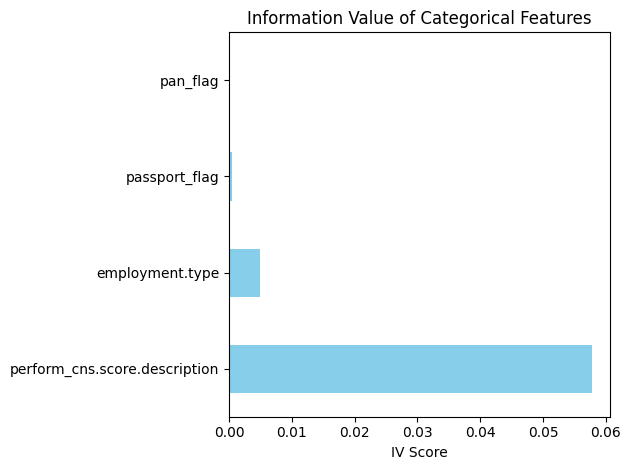

In [15]:
#Notebook3
#Credit Risk Modeling: WOE & Information Value (IV) Analysis for Categorical Features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/train.csv")  # Update path if needed
df.columns = df.columns.str.strip().str.lower()

# Set target
target = 'loan_default'

# Function to calculate WOE & IV
def calc_woe_iv(df, feature, target):
    lst = []
    for val in df[feature].dropna().unique():
        total = df[df[feature] == val].shape[0]
        good = df[(df[feature] == val) & (df[target] == 0)].shape[0]
        bad = df[(df[feature] == val) & (df[target] == 1)].shape[0]

        if good == 0:
            good = 0.5  # Avoid divide by zero
        if bad == 0:
            bad = 0.5

        dist_good = good / df[df[target] == 0].shape[0]
        dist_bad = bad / df[df[target] == 1].shape[0]

        woe = np.log(dist_good / dist_bad)
        iv = (dist_good - dist_bad) * woe

        lst.append({'Value': val, 'WOE': woe, 'IV': iv})

    iv_df = pd.DataFrame(lst)
    iv_total = iv_df['IV'].sum()
    return iv_df, iv_total

# Select top categorical columns from your dataset
categorical_features = [
    'employment.type',
    'perform_cns.score.description',
    'passport_flag',
    'pan_flag'
]

woe_iv_summary = {}

# Loop over selected features
for col in categorical_features:
    if col in df.columns:
        print(f"\n📊 WOE/IV for {col}:")
        woe_df, iv_score = calc_woe_iv(df, col, target)
        print(woe_df)
        print(f"Total IV for {col}: {iv_score:.4f}")
        woe_iv_summary[col] = iv_score
    else:
        print(f"Column '{col}' not found.")

# Plot IV Summary
import seaborn as sns
import matplotlib.pyplot as plt

iv_series = pd.Series(woe_iv_summary).sort_values(ascending=True)
iv_series.plot(kind='barh', color='skyblue')
plt.title("Information Value of Categorical Features")
plt.xlabel("IV Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:48:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ KS Statistic (Logistic Regression): 0.09950136054552905
✅ KS Statistic (XGBoost): 0.23698159077513903


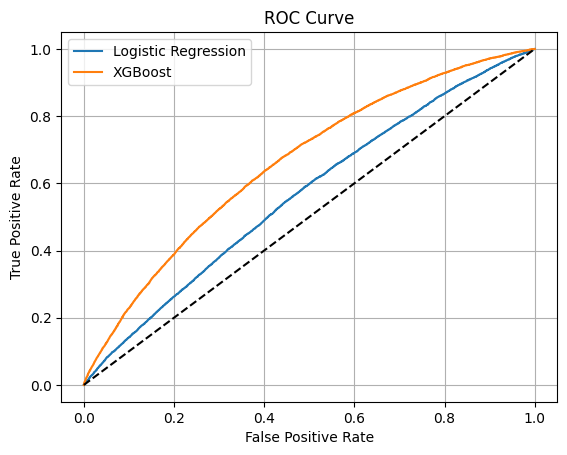

In [17]:
#Notebook4
#Credit Risk Modeling: Logistic Regression vs. XGBoost — ROC & KS Statistic Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# ✅ Corrected target column
target = 'loan_default'

# Step 1: Prepare features and target
# Drop ID columns and non-numeric ones for simplicity
X = df.select_dtypes(include=[np.number]).drop([target], axis=1)
y = df[target]

# Fill missing values
X = X.fillna(0)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
probs_lr = lr.predict_proba(X_test)[:,1]

# Step 4: XGBoost Classifier
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
probs_xgb = model_xgb.predict_proba(X_test)[:,1]

# Step 5: KS Statistic Function
def ks_stat(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    ks = max(tpr - fpr)
    return ks

# Step 6: Print KS Statistics
print("✅ KS Statistic (Logistic Regression):", ks_stat(y_test, probs_lr))
print("✅ KS Statistic (XGBoost):", ks_stat(y_test, probs_xgb))

# Step 7: Plot ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, probs_xgb)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


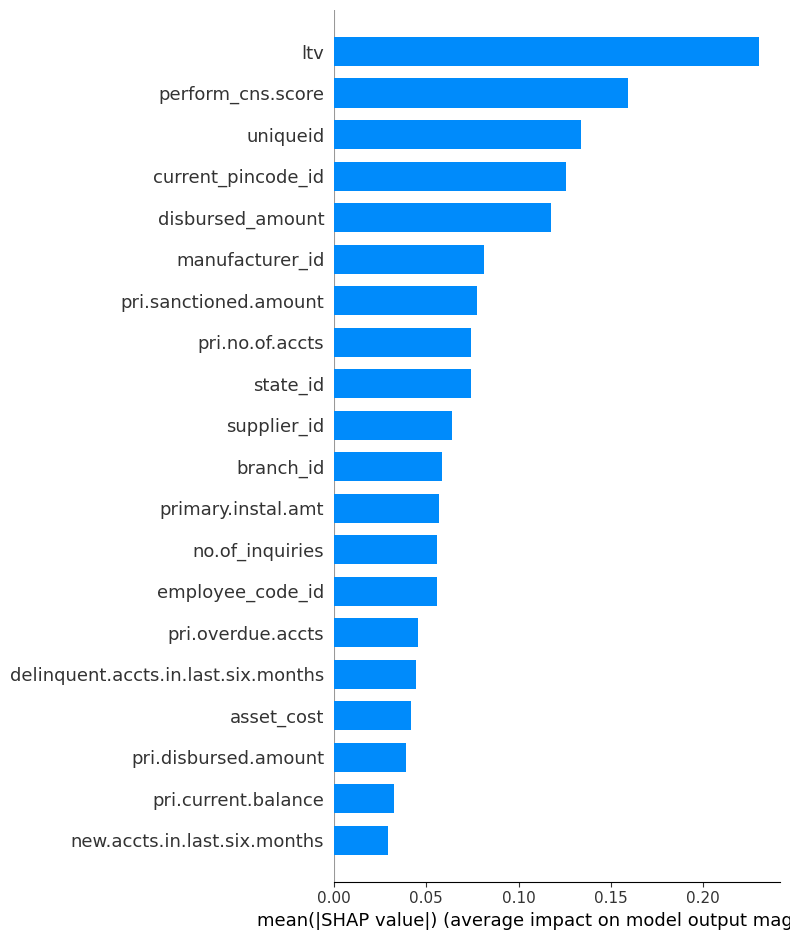

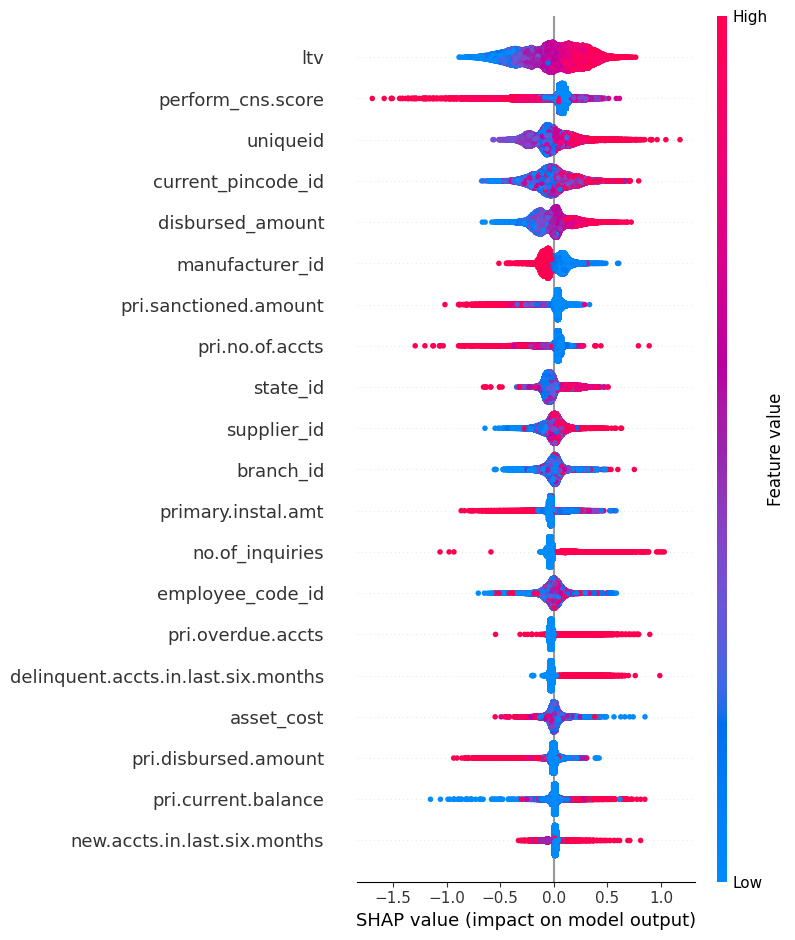

In [19]:
#✅ Notebook 5: Model Interpretability (SHAP & PDP)
# ✅ SHAP Analysis
import shap
import matplotlib.pyplot as plt

# Ensure SHAP visuals work in Jupyter/Colab
shap.initjs()

# Use TreeExplainer for tree-based models
explainer = shap.TreeExplainer(model_xgb)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)




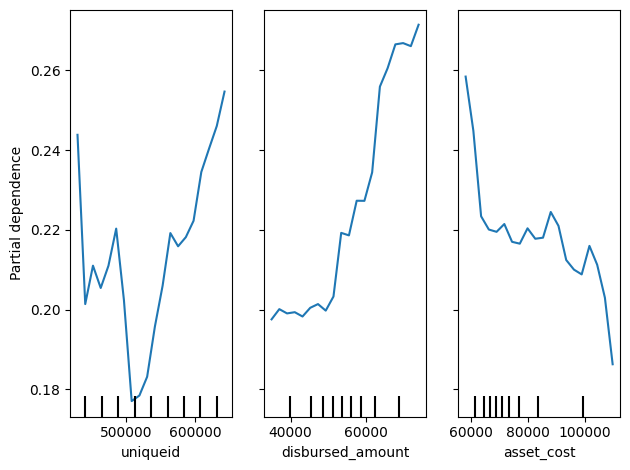

In [20]:
#Partial Dependence Plots (PDP)
from sklearn.inspection import PartialDependenceDisplay

# Option 1: Use the first 3 numerical columns
features_for_pdp = list(X_test.columns[:3])

# Option 2: (Optional) Select top 3 important features from model
# importances = model_xgb.feature_importances_
# important_features = pd.Series(importances, index=X_test.columns).sort_values(ascending=False).head(3).index.tolist()

# PDP Display
PartialDependenceDisplay.from_estimator(
    model_xgb,
    X_test,
    features=features_for_pdp,
    kind="average",
    grid_resolution=20
)
plt.tight_layout()
plt.show()


In [21]:
#✅ Notebook 6: Scorecard Development
# Example: Assign points based on logistic regression
import math
import pandas as pd

# ✅ Function to calculate credit score based on odds
def calculate_points(prob, base_score=600, PDO=50):
    odds = prob / (1 - prob)
    score = base_score - PDO * math.log(odds, 2)
    return score

# ✅ Use probabilities from logistic regression (from Notebook 4)
# probs_lr = lr.predict_proba(X_test)[:, 1]  # Already calculated

# Create a score column for the test set
scorecard_df = X_test.copy()
scorecard_df['actual'] = y_test
scorecard_df['prob_default'] = probs_lr
scorecard_df['score'] = scorecard_df['prob_default'].apply(lambda x: calculate_points(x))

# ✅ Display a few rows
print(scorecard_df[['actual', 'prob_default', 'score']].head())




        actual  prob_default       score
1197         1      0.188161  705.461487
109250       0      0.209970  695.586270
171069       0      0.219565  691.481443
227346       0      0.204543  697.968977
136799       0      0.036100  836.941014


<ipython-input-22-b35e6900e44f>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = scorecard_df.groupby('risk_segment')['actual'].mean()



📊 Default Rate by Risk Segment:
risk_segment
High Risk      0.259586
Medium Risk    0.220614
Low Risk       0.173057
Name: actual, dtype: float64


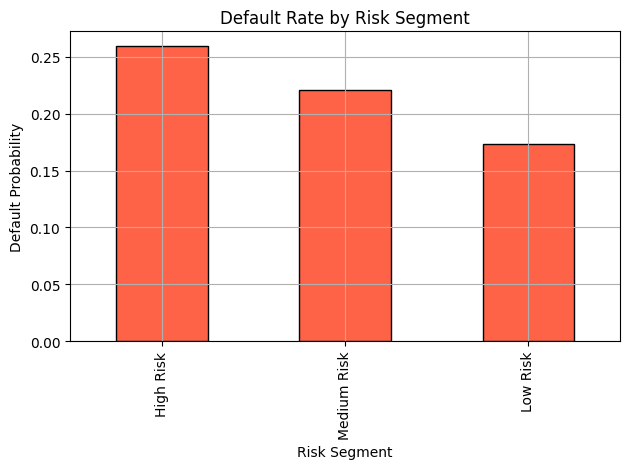

In [22]:
#Notebook 7: Risk Strategy
# Segmentation-based strategy
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Step 1: Use scorecard_df from Notebook 6
# This includes: prob_default, score, and actual loan_default labels

# ✅ Step 2: Segment by score using quantiles
scorecard_df['risk_segment'] = pd.qcut(scorecard_df['score'], q=3, labels=['High Risk', 'Medium Risk', 'Low Risk'])

# ✅ Step 3: Analyze default rate per segment
segment_analysis = scorecard_df.groupby('risk_segment')['actual'].mean()
print("\n📊 Default Rate by Risk Segment:")
print(segment_analysis)

# ✅ Step 4: Visualize results
segment_analysis.plot(kind='bar', color='tomato', edgecolor='black')
plt.title("Default Rate by Risk Segment")
plt.ylabel("Default Probability")
plt.xlabel("Risk Segment")
plt.grid(True)
plt.tight_layout()
plt.show()

